In [2]:
# importing libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import warnings
# warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv('Q1_Dataset.csv')
df.head() # to see the first 5 rows of the dataset

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K


In [4]:
df.isnull().sum() # This code prints number of null values

age                0
workclass          0
fnlwgt             0
education          0
educational-num    0
marital-status     0
occupation         0
relationship       0
race               0
gender             0
capital-gain       0
capital-loss       0
hours-per-week     0
native-country     0
income             0
dtype: int64

In [5]:
df=df.drop(['educational-num','marital-status','capital-gain','capital-loss','relationship'], axis=1)

In [6]:
#normalization
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
df['fnlwgt']= scaler.fit_transform(df[['fnlwgt']]) 


In [7]:
df.replace('?','0',inplace=True)
df.head()

,age,workclass,fnlwgt,education,occupation,race,gender,hours-per-week,native-country,income
0,25,Private,0.145129,11th,Machine-op-inspct,Black,Male,40,United-States,<=50K
1,38,Private,0.052451,HS-grad,Farming-fishing,White,Male,50,United-States,<=50K
2,28,Local-gov,0.219649,Assoc-acdm,Protective-serv,White,Male,40,United-States,>50K
3,44,Private,0.100153,Some-college,Machine-op-inspct,Black,Male,40,United-States,>50K
4,18,0,0.061708,Some-college,0,White,Female,30,United-States,<=50K


/var/folders/5f/1b1zms0j03d6wzq402h8fw8c0000gn/T/ipykernel_27190/1575595157.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True)


<AxesSubplot: >

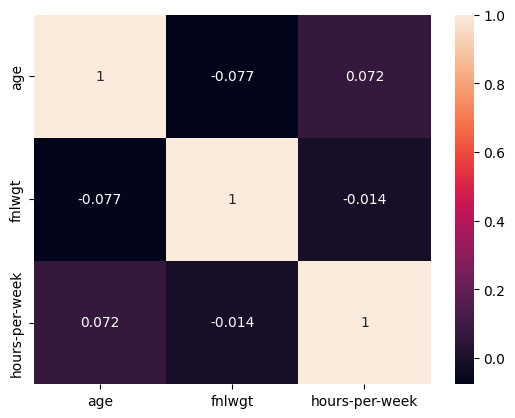

In [8]:
# heatmap
import seaborn as sns
sns.heatmap(df.corr(), annot=True)

In [9]:
# Label encoding
from sklearn.preprocessing import LabelEncoder as le
for i in df.columns:
    if i not in ['age','hours-per-week']:
            df[i] = le.fit_transform(df[i],df[i])
            


In [10]:
from sklearn.model_selection import train_test_split

X = df.drop('income', axis=1)
y = df['income']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) 

In [11]:
# SVM
from sklearn.svm import SVC

svm = SVC()
svm.fit(X_train, y_train)

y_pred = svm.predict(X_test) 
print(f'Accuracy score of model is {svm.score(X_test, y_test)}')

Accuracy score of model is 0.7655850138192241


In [12]:
# SVM with hyperparameter tuning
from sklearn.svm import SVC

acc = []
best_param = None

for i in range(1, 11):
    svm = SVC(C=i)
    svm.fit(X_train, y_train)
    acc.append(svm.score(X_test, y_test))
    if acc[i-1] == max(acc):
        best_param = i

print(f'Accuracy score of model is {max(acc)} with C = {best_param}')

 # This cell was not run because it would take a lot of time to run

In [16]:
# evaluation metrics

from sklearn.metrics import confusion_matrix, classification_report

conf_mat = confusion_matrix(y_test, y_pred)
conf_mat

array([[7479,    0],
       [2290,    0]])

In [17]:
# parameters
TP = conf_mat[0][0]
TN = conf_mat[1][1]
FP = conf_mat[0][1]
FN = conf_mat[1][0]

# accuracy
accuracy = (TP + TN) / (TP + TN + FP + FN)
print(f'Accuracy of model is {accuracy}')

# precision
precision = TP / (TP + FP)
print(f'Precision of model is {precision}')

# recall
recall = TP / (TP + FN)
print(f'Recall of model is {recall}')

# f1 score
f1_score = 2 * precision * recall / (precision + recall)
print(f'F1 score of model is {f1_score}')

# sensitivity
sensitivity = TP / (TP + FN)
print(f'Sensitivity of model is {sensitivity}')

# specificity
specificity = TN / (TN + FP)
print(f'Specificity of model is {specificity}')

# classification report
print(classification_report(y_test, y_pred))

Accuracy of model is 0.7655850138192241
Precision of model is 1.0
Recall of model is 0.7655850138192241
F1 score of model is 0.8672309833024118
Sensitivity of model is 0.7655850138192241
Specificity of model is nan
              precision    recall  f1-score   support

           0       0.77      1.00      0.87      7479
           1       0.00      0.00      0.00      2290

    accuracy                           0.77      9769
   macro avg       0.38      0.50      0.43      9769
weighted avg       0.59      0.77      0.66      9769



/var/folders/5f/1b1zms0j03d6wzq402h8fw8c0000gn/T/ipykernel_27190/1782755444.py:28: RuntimeWarning: invalid value encountered in long_scalars
  specificity = TN / (TN + FP)
/Users/carbon/miniconda3/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/carbon/miniconda3/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/carbon/miniconda3/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.

In [18]:
# plotting curves 

#roc curve

from sklearn.metrics import roc_curve, roc_auc_score

temp1 = svm.predict_proba(X_test)
temp1 = [i[1] for i in temp1]

fr, tr, th = roc_curve(y_test, temp1)
plt.plot(fr, tr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve')
plt.show()

AttributeError: predict_proba is not available when  probability=False